# 1. Import Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
%matplotlib inline

In [4]:
path = r'C:\Users\kamil\Documents\6 Advanced Analytics & Dashboard Design\1'

In [5]:
df = pd.read_csv(os.path.join(path,'boat_data_cleaned.csv'), index_col = False)

In [6]:
df.head()

,Unnamed: 0,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,EUR_price,Country,City
0,1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490.0,Germany,BÃ¶nningstedt
1,4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399.0,Germany,Bayern
2,10,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,239,3570.0,Switzerland,Seengen
3,12,Sport Boat,GS Nautica power boats,Used boat,2004,4.70,2.00,GRP,69,3500.0,Italy,Lake Garda
4,13,Runabout,Kimple power boats,new boat from stock,2020,4.40,1.65,Aluminium,113,4692.0,Switzerland,Zugersee


In [7]:
# Drop the redundant columns
df = df.drop(['Unnamed: 0'],axis = 1)

# 2. Cleaning data

In [8]:
df.columns

Index(['Boat Type', 'Manufacturer', 'Type', 'Year Built', 'Length', 'Width',
       'Material', 'Number of views last 7 days', 'EUR_price', 'Country',
       'City'],
      dtype='object')

In [9]:
# Rename the columns.
df.rename(columns = {'Number of views last 7 days':'7days_views'}, inplace = True)

In [10]:
df.columns

Index(['Boat Type', 'Manufacturer', 'Type', 'Year Built', 'Length', 'Width',
       'Material', '7days_views', 'EUR_price', 'Country', 'City'],
      dtype='object')

In [11]:
df.shape

(6001, 11)

In [12]:
# check for missing values
df.isnull().sum()

Boat Type       0
Manufacturer    0
Type            0
Year Built      0
Length          0
Width           0
Material        0
7days_views     0
EUR_price       0
Country         0
City            0
dtype: int64

In [13]:
# check for duplicates
dups = df.duplicated()

In [14]:
dups.shape


(6001,)

### Extreme value check

C:\Users\kamil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Length', ylabel='Density'>

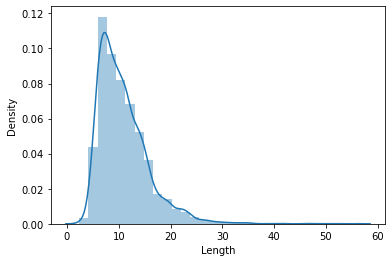

In [15]:
# extreme value check
sns.distplot(df['Length'], bins=30) # Shows extreme values

In [16]:
df['Length'].mean()#check for mean

10.834530911514786

In [17]:
df['Length'].median() #check for median

9.88

In [18]:
df['Length'].max() #check for max

56.0

# 3. Data prep for regression analysis

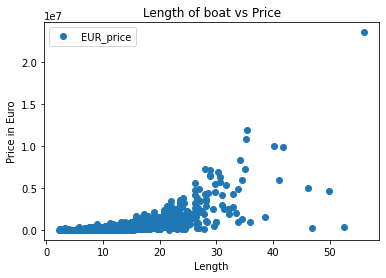

In [19]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Length', y='EUR_price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Length of boat vs Price')  
plt.xlabel('Length')  
plt.ylabel('Price in Euro')  
plt.show()

In [20]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Length'].values.reshape(-1,1)
y = df['EUR_price'].values.reshape(-1,1)

In [21]:
X

array([[4.  ],
       [3.55],
       [4.35],
       ...,
       [6.  ],
       [4.4 ],
       [3.6 ]])

In [22]:
y

array([[3490. ],
       [3399. ],
       [3570. ],
       ...,
       [5049. ],
       [4499. ],
       [3855.6]])

In [23]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Hypothesis

#### The higher the length of the boat, the higher the price

# 4. Regression analysis

In [24]:
regression = LinearRegression()

In [25]:
regression.fit(X_train, y_train)

LinearRegression()

In [26]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

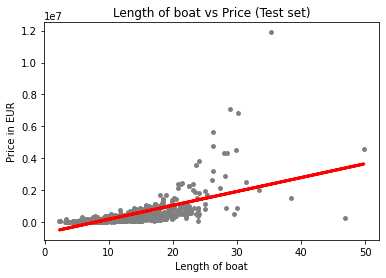

In [27]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Length of boat vs Price (Test set)')
plot_test.xlabel('Length of boat')
plot_test.ylabel('Price in EUR')
plot_test.show()

In [28]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted)

In [29]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[87129.53602373]]
Mean squared error:  188101017128.7506
R2 score:  0.37527128064359916


#### Findings

The slope value is positive, which means that the relationship between Price and Lenght of the boat are positive. This aligns with the hypothesis that the higher the boat length, the higher the price. The MSE value is high, so the regression line is not at all a representation of the data. Also, the R2 score is 0.38 which represents a poor fit.

In [30]:
y_predicted

array([[ 193273.23711307],
       [-143918.06729877],
       [ 209827.84895758],
       ...,
       [-137818.99977711],
       [  10301.21146324],
       [  -4510.8096608 ]])

In [31]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,69900.0,1.932732e+05
1,55998.0,-1.439181e+05
2,90000.0,2.098278e+05
3,38900.0,7.564836e+04
4,150000.0,-5.765983e+04
5,187000.0,8.871779e+04
6,34500.0,-8.466998e+04
7,575000.0,1.147342e+06
8,99890.0,1.030121e+04
9,15500.0,-9.861071e+04


### How the regression fits the training set

In [32]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [33]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [34]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[87129.53602373]]
Mean squared error:  271297129629.1697
R2 score:  0.39990074365591677


### Findings:


#### The values are very close to the model - positive relationship, high MSE values and a low R2. 

#### This is an indication that the length of the boat is not a good determinant of the cost of the boat. This is true findings because in reality there are other important factors that would be considered in determining the value of a boat. 

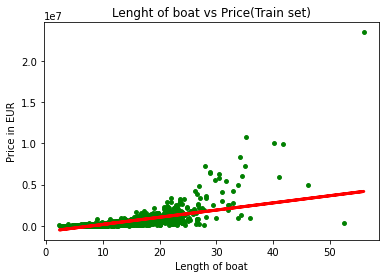

In [35]:
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Lenght of boat vs Price(Train set)')
plot_test.xlabel('Length of boat')
plot_test.ylabel('Price in EUR')
plot_test.show()

### Bonus: performance improvement after removing outliers

In [36]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df[df['EUR_price'] <=20000000]

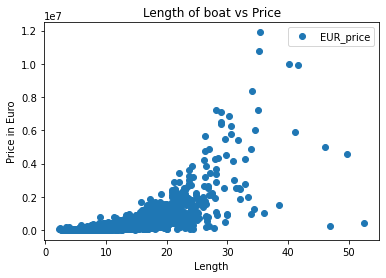

In [37]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'Length', y='EUR_price',style='o')
plt.title('Length of boat vs Price')  
plt.xlabel('Length')  
plt.ylabel('Price in Euro')  
plt.show()

In [38]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X_2 = df_test['Length'].values.reshape(-1,1)
y_2 = df_test['EUR_price'].values.reshape(-1,1)

In [39]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [40]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [41]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [42]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [43]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[76090.45628899]]
Mean squared error:  184063984464.70312
R2 score:  0.41589522161289905


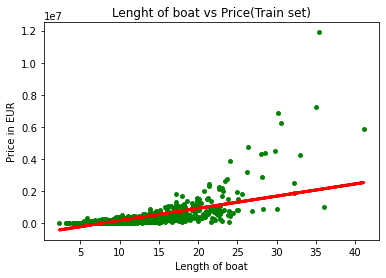

In [44]:
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='green', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Lenght of boat vs Price(Train set)')
plot_test.xlabel('Length of boat')
plot_test.ylabel('Price in EUR')
plot_test.show()

In [45]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,69900.00,193272.695417
1,1250000.00,919936.552977
2,18995.00,52505.351282
3,38900.00,90550.579427
4,150000.00,-25867.818696
5,187000.00,101964.147870
6,17338.98,-213811.245729
7,145000.00,254145.060448
8,99890.00,33482.737210
9,15500.00,-61630.333151


### Findings: 

### After removing outliners we obtained slightly better values of R2. This indicates that when we remove outliners, we obtain slightly better results